## Курсовая работа по численным методам.

### Раздел 1. Задача 1.2. Интегральные уравнения. 

#### Выполнил студент группы А-05-19 Ушаков Н.А.

### Задача.

Найти решение интегрального уравнения:

$$
u(x) - \lambda\int_{a}^{b}K(x,s)u(s)ds = f(x),\quad x \in [a,b]
$$

методом квадратур для каждого значения $\lambda$ из указанного отрезка $[\alpha,\beta]$. При каждом значении $\lambda$ построить график решения и вычислить площадь полученной криволинейной трапеции. Определить, при каком значении площадь трапеции максимальна.

### Исходные данные.

Ядро интегрального уравнения: $K(x,s) = e^{\displaystyle{-|x-s|}}$

Отрезок интегрирования: $[a,b] = [1,2]$

Отрезок параметра $\lambda$: $[\alpha,\beta] = [0.2,0.7]$

Метод интерполяции функции: Многочлен Лагранжа

Квадратурная формула: Метод трапеций

Решение СЛАУ: Метод сопряженных градиентов


Функция $f(x)$:

|   $x$  |  1.0  |  1.1  |  1.2  |  1.3  |  1.4  |  1.5  |  1.6  |  1.7  |  1.8  |  1.9  |  2.0  |
|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|:-----:|
| $f(x)$ | 7.679 | 7.329 | 7.012 | 6.725 | 6.466 | 6.231 | 6.012 | 5.827 | 5.653 | 5.496 | 5.353 |


### Теория.

### Уравнение Фредгольма второго рода.

Уравнение Фредгольма второго рода имеет следующий вид:

$$
u(x) - \lambda\int_{a}^{b}K(x,s)u(s)ds = f(x),\quad x \in [a,b] \qquad(1)
$$

Здесь $u(x)$ - неизвестная функция, $K(x,s)$ - ядро интегрального уравнения, $f(x)$ - свободный член интегрального уравнения, $\lambda$ - числовой параметр.

### Метод квадратур.

Одним из наиболее простых методов решения интегральных уравнений с гладкими ядрами является **метод квадратур**, основанный на аппроксимации значений интегрального оператора, входящего в уравнение с использованием одной из квадратурных формул.

Построим на отрезке $[a,b]$ сетку с узлами $x_1,x_2,\dots,x_n$. Запишем уравнение (1) в узлах сетки:

$$
u(x_i) - \lambda\int_{a}^{b}K(x_i,s)u(s)ds = f(x_i),\quad i = 1,2,\dots,N \qquad(2)
$$

Пусть за основу взята квадратурная формула:

$$
\int_{a}^{b}g(s)ds \approx \sum_{j=0}^{N}c_{j}g(x_j) \qquad(3)
$$

Используя (3) при $g(s) = K(x,s)u(s)$ для приближенного вычисления значения интегрального оператора, имеем:

$$
\int_{a}^{b}K(x_i,s)u(s)ds \approx \sum_{j=0}^{N}c_{j}g(x_j) \qquad(4)
$$

Подставив записанную выше аппроксимацию (4) в равенство (2), получим следующую систему линейных алгебраических уравнений:

$$
u_{i} - \lambda\int_{a}^{b}c_{j}K_{ij}u_{j} = f_{i},\quad i = 1,2,\dots,N \qquad(5)
$$

Здесь: $u_{i} = y(x_i),\quad f_{i} = f(x_i),\quad K_{ij} = K(x_i,x_j),\quad c_{j} > 0$ - веса квадратурной формулы.

Используем указанную в задании квадратурную **формулу трапеций**. Тогда СЛАУ примет следующий вид:

$$
u_{i} - \lambda\int_{a}^{b}\omega_{j}K_{ij}u_{j} = f_{i},\quad i = 1,2,\dots,N \qquad(6)
$$

Где $\omega_{j}$ - веса формулы трапеций:
$$
\omega_j = 
\left
\{
\begin{array}{l l}
\dfrac{1}{2},& j = 1,N\\
1,& j=2,3,\dots,N-1
\end{array}
\right.
$$


Введем матрицу $B_N$ c элементами $b_{ij}=\omega_{j}K_{ij}, 0\le i, j\le N$, вектор свободных членов $f_{N} = \left(f_0,f_1,\dots,f_N\right)^T$ и вектор неизвестных $u_{N} = \left(u_0,u_1,\dots,u_N\right)$. Запишем систему (6) в матричном виде:

$$
u_{N} = B_{N}u_{N} + f_{N}
$$

Эту же систему можно записать в виде, удобном для решения СЛАУ:

$$
A_{N}u_{N} = f_{N} \qquad(7)
$$

Где: $A_{N} = E_{N} - B_{N}$, а $E_{N}$ - единичная матрица.


**Примечание.** При написании алгоритма нахождения решения интегрального уравнения, опираясь на вышеизложенное, будем сначала определять матрицу $B_{N}$, используя **квадратурную формулу трапеций**, после чего, вычитая из нее единичную, находить матрицу $A_{N}$ $(7)$. Задавая вектор неизвестных $u_{N}$ и вектор свободных членов $f_{N}$, решая СЛАУ, получим искомый ответ. 

Приведем некоторый допольнительный теоретический материал и перейдем к **интерполированию функции** и **решению СЛАУ**. 


### Теория Фредгольма.

Положим: $$\|K\| = \sqrt{\int_{a}^{b}\int_{a}^{b}|K(x,s)|^2 dxds}$$ 


### Теорема 16.5. (Единственность решения).

Пусть ядро $K$ удовлетворяет условию:

$$\|K\| = \sqrt{\int_{a}^{b}\int_{a}^{b}|K(x,s)|^2 dxds} <1 \qquad(8)$$ 

Тогда при любой правой части $f$ уравнение (1) имеет единственное решение. 

Теперь стоит обсудить интерполирование функции правой части интегрального уравнения $f(x)$.

### Многочлен Лагранжа.

Данный многочлен имеет следующий вид:

$$
L_{N}(x) = \sum_{i=0}^{N}f_{i}\prod_{k=0\\k\neq i}^{N}\dfrac{(x-x_k)}{(x_i-x_k)} \qquad(9)
$$

Он представляет собой сумму $n+1$ слагаемого, каждое из которых есть многочлен степени $n$. При $k\neq i$ $k$-ое слагаемое обращается в ноль, а при $k=i$ числитель и знаменатель дроби совпадают.

Перейдем к решению СЛАУ $(7)$.

### Метод сопряженных градиентов.

В методе сопряженных градиентов приближенное решение вычисляется посредством следующих величин:

Начальный вектор невязки: $r^{(0)} = Ax^{(0)} - b$

Начальное направление спуска: $p^{(0)} = r^{(0)}$

Параметр: $\alpha_{n+1} = \dfrac{\left(r^{(n)},r^{(n)}\right)}{Ap^{(n)},p^{(n)}}$

Шаг итерации: $x^{(n+1)} = x^{(n)} + \alpha_{n+1}p^{(n)}$ 

Вектор невязки: $r^{(n+1)} = r^{(n)} - \alpha_{n+1}Ap^{(n)}$

Параметр: $\beta_{n+1} = \dfrac{\left(r^{(n+1)},r^{(n+1)}\right)}{r^{(n)},r^{(n)}}$

Вектор направления: $p^{(n+1)} = r^{(n+1)} + \beta_{n+1}p^{(n)}$

Критерий окончания итераций: $\dfrac{\|r^{(n)}\|}{\|r^{(0)}\|} \leq \varepsilon$


### Решение поставленной задачи.

Перейдем к непосредственной реализации алгоритма и решению поставленной задачи.

In [376]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate as inteq 

### Функции.

Напишем функции для интерполяции многочленом Лагранжа, решения СЛАУ методом сопряженных градиентов, вычисления Евклидовой нормы вектора, получения коэффициентов формулы трапеций:

In [377]:
# Значение многочлена Лагранжа в точке
def lagrange(x, y, x_0):
    polynom = 0 
    for i in range(len(y)):
        prod = 1
        for k in range(len(x)):
            if k != i:
                prod *= ((x_0 - x[k]) / (x[i] - x[k])) 
        polynom += y[i] * prod
    return polynom  

# Решение СЛАУ методом сопряженных градиентов 
def conjugate_gradient(A, b, eps):
    n = A.shape[0]
    x = np.zeros(n)
    # Вычисляем вектор невязки
    r0 = b - A @ x
    r = r0
    p = r
    n_r0 = euclid_norm(r0)
    while euclid_norm(r) / n_r0 > eps:
        # Вычисляем параметр a
        a = np.dot(r, r) / np.dot(A @ p, p)
        x += a * p
        r_next = r - a * (A @ p)
        B = np.dot(r_next, r_next) / np.dot(r, r)
        p = r_next + B * p
        r = r_next
    return x

# Евклидова норма вектора
def euclid_norm(x):
    s = 0
    n = x.shape[0]
    for i in range(n):
        s += (x[i])**2
    return np.sqrt(s)

# Коэффициенты квадратурной формулы трапеций
def trapezoid(j):    
    return 1/2*h if j == 0 or j == n-1 else h

### Метод.

Решение поставленной задачи: 

**Примечание.** Для компактной записи, при формировании векторов и матриц, я использую генераторы массивов, вместо привычных конструкций с циклами `for`. В качестве свободного члена мы можем указать функцию, заданную как таблично, так и аналитически, за что отвечает параметр `f`,значение по умолчанию которого - `None`, указывает на таблично заданную функцию. Числовой параметр `lambd`, так же имеет значение по умолчанию равное единице.

In [446]:
# Решение интегрального уравнения Фредгольма второго рода
def fredholm(K, a, b, h, lambd = 1, f = None): 
    # Составляем матрицы для СЛАУ
    n = int((b - a) / h) + 1
    x = np.linspace(a, b, n)  
    # Определяем матрицу B
    B = np.array([[lambd * trapezoid(j) * K(x[i], x[j]) for j in range(n)] for i in range(n)])
    E = np.eye(len(B))   
    # Вычисляем матрицу A
    A = E - B 
    # Задаем данные для интерполяционной функции
    x_data = np.array([1., 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.])
    x_data = np.array([7.679, 7.329, 7.012, 6.725, 6.466, 6.231, 6.012, 5.827, 5.653, 5.496, 5.353]) 
    # Составляем вектор правой части в зависимости от функции
    # Если параметр f = None - табличная функция, иначе - заданная аналитически
    F = np.array([lagrange(x_data, x_data, x[i]) for i in range(n)]) if f is None else np.array([f(x[j]) for j in range(n)])
    # Решаем СЛАУ методом сопряженных градиентов с заданной точностью   
    return conjugate_gradient(A, F, eps)

### Тестовый пример.

Чтобы убедиться в корректности работы написанного алгоритма, составим тестовый пример: 

**Общий вид уравнения:** 
$$
u(x) - \lambda\int_{a}^{b}K(x,s)u(s)ds = f(x),\quad x \in [a,b]
$$

Пусть: $K(x,s) = 1-xs$, $f(x) = x^3$ 

Положим также: $[a,b] = [0,1]$, $\lambda = 1$

**Имеем:** 
$$
u(x) = \int_{0}^{1}(1-xs)u(s)ds + f(x) \
$$

Перепишем наше уравнение, используя свойство аддитивности интеграла:

$$
u(x) = \underbrace{\int_{0}^{1}u(s)ds}_{\displaystyle{C_1}} - x\underbrace{\int_{0}^{1}su(s)ds}_{\displaystyle{C_2}} + f(x)
$$

Обозначим следующие константы:
$$
\left\{
\begin{array}{l}
C_1 = \displaystyle{\int_{0}^{1}u(s)ds} \\
C_2 = \displaystyle{\int_{0}^{1}su(s)ds}
\end{array}
\qquad(10)
\right.
$$

Представим наше решение в виде:
$$
u(x) = C_1 - C_2x + x^3 \qquad(11)
$$

Заменим $x$ на $s$ в $(11)$ и подставим в $(10)$:

$$
\left\{
\begin{array}{l}
C_1 = \displaystyle{\int_{0}^{1} \left(C_1 - C_2s + s^3\right)ds} \\
C_2 = \displaystyle{\int_{0}^{1} \left(C_1s - C_2s^2 + s^4\right) ds}
\end{array}
\qquad(12)
\right.
$$

$$
\left\{
\begin{array}{l}
C_1 = \displaystyle{C_1 - \frac{C_2}{2} + \frac{1}{4}} \\
C_2 = \displaystyle{\frac{C_1}{2} - \frac{C_2}{3} + \frac{1}{5}}
\end{array}
\right.
\Rightarrow
\left\{
\begin{array}{l}
C_1 = \displaystyle{\frac{14}{15}} \\
C_2 = \displaystyle{\frac{1}{2}}
\end{array}
\qquad(13)
\right.
$$

Подставим (13) в (11) и получим решение:
$$
u(x) = x^{3} - \frac{1}{2}x + \frac{14}{15}
$$

**Получено аналитическое решение.**

Далее, найдем численное решение тестового примера, используя наш алгоритм. Графики решений, полученных обеими методами, должны совпадать, а площади криволинейных трапеций - быть примерно равными, с учетом некоторой погрешности.

In [465]:
# Данные тестового примера
a, b = 0, 1                   # Границы отрезка [a,b]     
h = 0.01                      # Шаг разбиения
n = int((b - a) / h) + 1      # Количество точек    
lambd, eps = 1, 1e-6          # Параметр λ и точность ε

# Модели тестового примера
u = lambda x: x**3 - 1/2*x +14/15    # Точное аналитическое решение
k = lambda x,s: 1 - x*s              # Ядро интегрального уравнения 
f = lambda x: x**3                   # Функция правой части

Следует вспомнить про Теорему 16.5. Проверим условие $(8)$:

In [466]:
# Проверяем условие единственности решения
k_norm = np.sqrt(inteq.dblquad(lambda x, s: np.abs(k(x, s))**2, a, b, lambda x: a, lambda x: b)[0])
print(f'║K║ = {k_norm:.4f}', '<' if k_norm < 1 else '>', '1')

║K║ = 0.7817 < 1


**Примечание.** Воспользуемся методом `dblquad` из библиотеки `scipy` для подсчета двойного интеграла.

Получаем значение:
$$\|K\| = \sqrt{\int_{0}^{1}\int_{0}^{1}\left|1-xs\right|^2 dxds} = 0.7817 <1$$ 

Условие выполнено $\Rightarrow$ решение единственно.

Ищем решение, вычисляем площади криволинейных трапеций и строим графики:

**Примечание.** Для вычисления площади криволинейной трапеции используем метод `trapz` из библиотеки `numpy`. Результат выводим в легенду соответствующего графика.

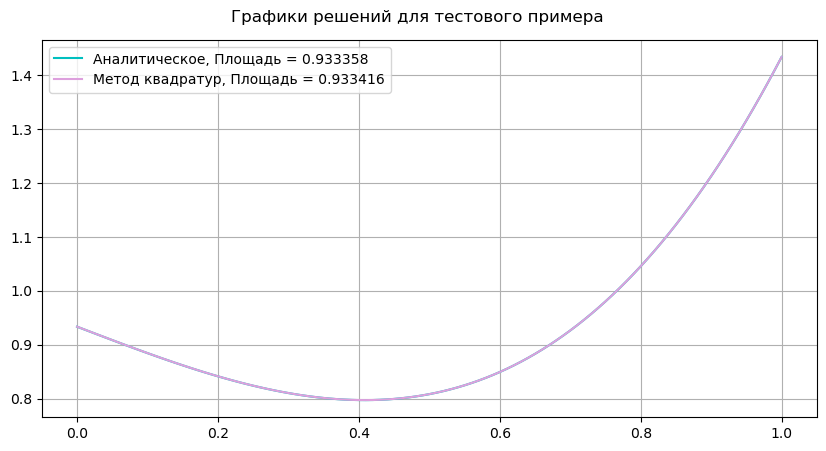

In [470]:
# Задаем данные для построения графика 
x_data = np.linspace(a, b, n)
y_data = fredholm(k, a, b, h, lambd, f)

# Выводим графики решений (аналитическое и численное) 
fig, axs = plt.subplots(1, 1, figsize=(10,5), dpi=100)
axs.plot(x_data, u(x_data), color='c', label=f'Аналитическое, Площадь = {np.trapz(u(x_data), x_data):.6f}')
axs.plot(x_data, y_data, color='plum', label=f'Метод квадратур, Площадь = {np.trapz(y_data, x_data):.6f}')
plt.suptitle('Графики решений для тестового примера', y=0.94)
plt.legend()
plt.grid()

### Результат.

Графики совпадают и накладываются друг на друга, а площади трапеций примерно одинаковые. Все это свидетельствует о верной работе алгоритма. Большей точности можно добиться, уменьшая шаг разбиения, тем самым увеличивая число точек.

### Исходный пример.

Имеем уравнение:

$$
u(x) - \lambda\int_{1}^{2}e^{\displaystyle{|x-s|}}u(s)ds = f(x),\quad x \in [1,2]
$$

Определим начальные данные и найдем решение задачи: 

In [471]:
# Ядро интегрального уравнения
K = lambda x,s: np.exp(-1 * np.abs(x - s))

# Начальные данные
a, b = 1, 2                 # Границы отрезка [a,b]
h = 0.01                    # Шаг разбиения
n = int((b - a) / h) + 1    # Количество точек
lambd, eps = 1, 1e-6        # Параметр λ и точность ε
alpha, beta = 0.2, 0.7      # Границы отрезка [α,β] 

Снова обращаемся к Теореме 16.5 и проверяем условие $(8)$:

In [472]:
# Проверяем условие единственности решения
k_norm = np.sqrt(inteq.dblquad(lambda x, s: np.abs(K(x, s))**2, a, b, lambda x: a, lambda x: b)[0])
print(f'║K║ = {k_norm:.4f}', '<' if k_norm < 1 else '>', '1')

║K║ = 0.7534 < 1


Получаем, что:
$$\|K\| = \sqrt{\int_{0}^{1}\int_{0}^{1}\left|e^{\displaystyle{|x-s|}}\right|^2 dxds} = 0.7534 <1$$ 

Условие выполнено $\Rightarrow$ решение единственно.

### Решение при λ = 1.

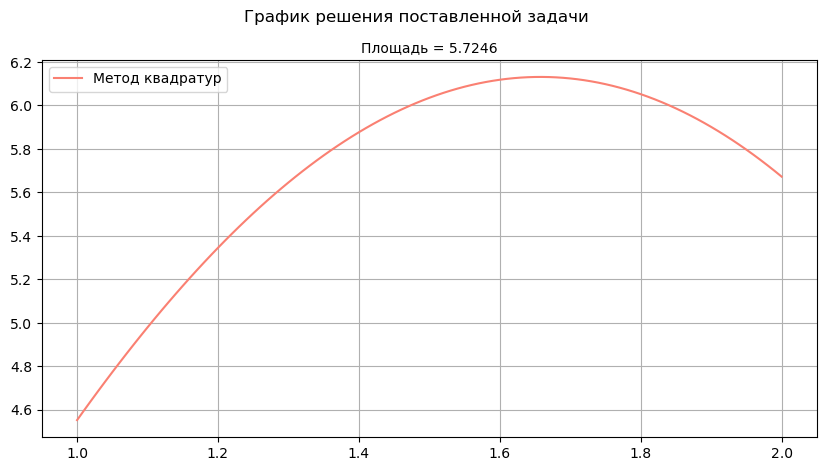

In [473]:
# Задаем данные для построения графика 
x_data = np.linspace(a, b, n)

# Выводим график решения поставленной задачи 
fig, axs = plt.subplots(1, 1, figsize=(10,5), dpi=100)
y_data = fredholm(K, a, b, h)
area = np.trapz(y_data, x_data)
axs.plot(x_data, y_data, color='salmon', label='Метод квадратур')
axs.set_title(f'Площадь = {area:.4f}', fontsize=10)
plt.suptitle('График решения поставленной задачи', y=0.98)
plt.legend()
plt.grid()

### Решение для каждого значения λ из указанного отрезка.

$[\alpha,\beta] = [0.2,0.7]$

Максимальное значение:
Параметр λ = 0.7,  Площадь = 3.0998.


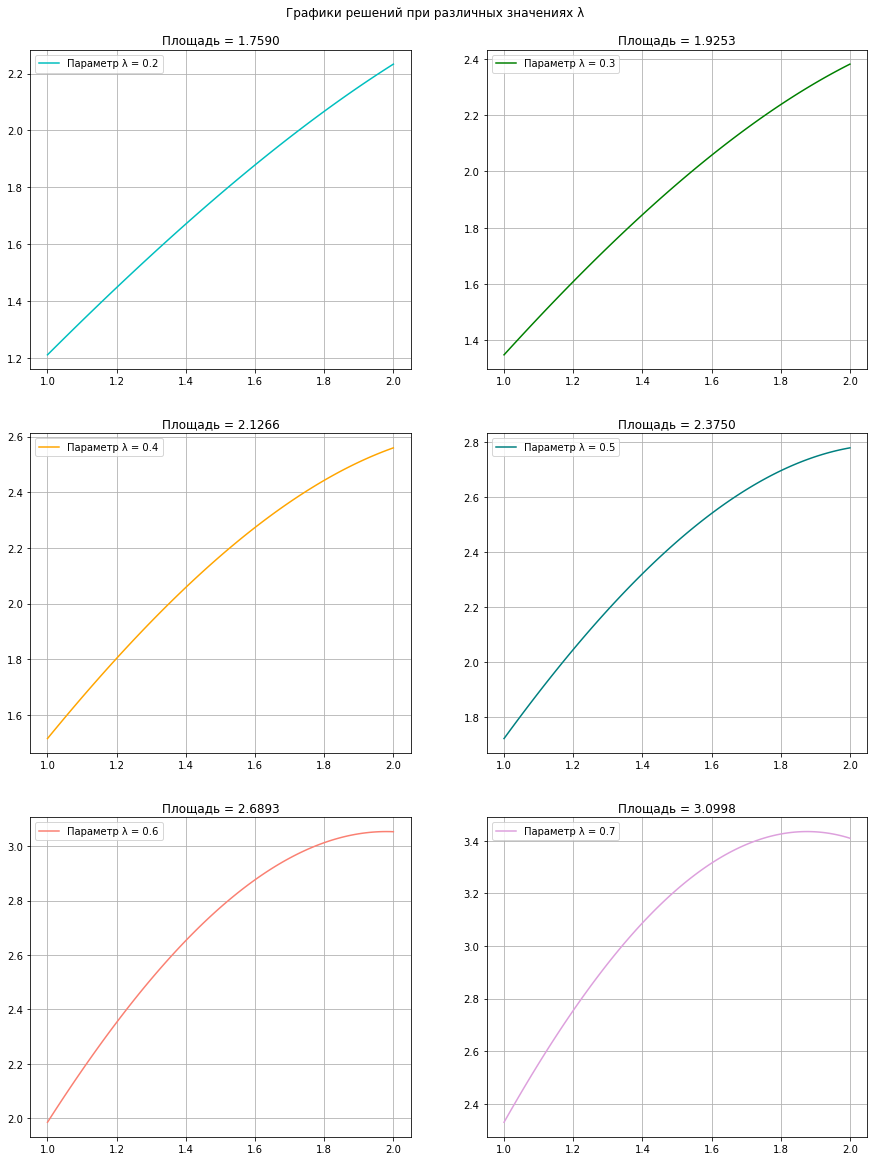

In [474]:
# Зададим шаг 0.1. Соответственно, получаем 6 значений λ
lambdas = np.linspace(alpha, beta, 6)

# Задаем кортежи стилей и цветов
styles = ('--', ':', '-.', '-')
colors = ('c', 'g', 'orange', 'teal', 'salmon', 'plum')

lambdas = np.reshape(lambdas, (-1, 2))
colors = np.reshape(colors, (-1, 2))
areas = []

# Выводим графики решения при разных значениях λ
fig, axs = plt.subplots(3, 2, figsize=(15,20))
for i in range(lambdas.shape[0]):
    for j in range(lambdas.shape[1]):
        y_data = fredholm(K, a, b, h, lambdas[i][j])
        areas.append(np.trapz(y_data, x_data))
        axs[i][j].plot(x_data, y_data, color=colors[i][j], label=f'Параметр λ = {lambdas[i][j]}') 
        axs[i][j].set_title(f'Площадь = {areas[-1]:.4f}')
        axs[i][j].legend()
        axs[i][j].grid()
        
plt.suptitle('Графики решений при различных значениях λ', y=0.91)

lambdas = np.reshape(lambdas, (-1))
print('Максимальное значение:', 
      f'Параметр λ = {lambdas[areas.index(max(areas))]},  Площадь = {max(areas):.4f}.', sep='\n')

### Вывод:

В данной курсовой работе мы рассмотрели решение интегрального уравнения Фредгольма второго рода методом квадратур, вспомнили интерполяцию таблично-заданной функции с помощью многочлена Лагранжа, а также решение системы линейных алгебраических уравнений методом сопряженных градиентов. Убедились в работоспособности построенного алгоритма и проанализировали полученные результаты.


### Литература:

1. Амосов А.А., Дубинский Ю.А., Копченова Н.В. Вычислительные методы (2014). Глава 16. § 16.3, 16.4.
2. Карчевский Е.М. Численные методы решения интегральных уравнений (2019). Глава 2. § 2.1.  
3. Амосова О.А. Лекция 8. Итерационные методы решения СЛАУ. § 8.1.
4. Амосова О.А. Лекция 11. Приближение функций по методу интерполяции. § 11.1.
